In [1]:
%run ../common/import_all.py

from scipy import optimize
from scipy.integrate import quad, odeint
from scipy.interpolate import interp1d
from scipy.signal import detrend
from scipy.spatial import distance
from matplotlib.legend_handler import HandlerLine2D

from nltk.book import *                                     # will print a list of books (texts) imported from here
from nltk.text import Text
from nltk.probability import FreqDist, ConditionalFreqDist
from nltk.tokenize import WordPunctTokenizer 
from nltk.corpus import brown, inaugural
from nltk import (word_tokenize, wordpunct_tokenize, sent_tokenize, pos_tag, bigrams, 
                  UnigramTagger, NgramTagger, PunktSentenceTokenizer, TreebankWordTokenizer)
from nltk.corpus import treebank, wordnet
from nltk.tag import pos_tag, UnigramTagger
from nltk.tag.sequential import NgramTagger
from nltk.corpus import brown
from nltk.stem import (PorterStemmer,
                       LancasterStemmer,
                       SnowballStemmer, 
                       WordNetLemmatizer)

from helpers import measure_lexical_diversity, compute_perc_word_usage, plot_freqdist_freq

%matplotlib inline

from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Playing around with NLTK

Some material has been taken/adapted from the [NLTK book](http://www.nltk.org/book/)

* Exploring NLTK books (Text instance)
* Exploring NLTK corpora
* Exploring NLTK Treebank
* Exploring the WordNet corpus

For the linguistics concepts used here, refer to [the specific notebook](../nlp/linguistic-notions.ipynb).

## Books and corpora

In [3]:
## List of all the books and sents imported
texts()
sents()

# Choose the book to play with and some wordsText
book = text2
word = 'love'
word2 = 'him'
words = ['love', 'kiss', 'marriage', 'sense', 'children', 'house', 'hate']

# Print first 100 token in book (book is an instance of nltk.text.Text, which behaves like a list of tokens)
# Note that punctuation is included as tokens
print(book[0:100], type(book))
print(list(book)[0:100] == book[0:100])

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .
['[', 'Sense', 'and', 'Sensibility', 'b

In [4]:
## Counts and lexical diversity
print('Num of tokens', len(book))
print('Num of counts for given word', book.count(word))
print('Lexical diversity', measure_lexical_diversity(book))
print('Fraction of use of word in book', compute_perc_word_usage(word, book))

Num of tokens 141576
Num of counts for given word 77
Lexical diversity 0.04826383002768831
Fraction of use of word in book 0.0005438774933604566


In [5]:
## Concordance and context

# Choose a book and a word
book = text2
word = 'love'

# Concordance of chosen word in chosen book
print('Concordance: ')
book.concordance(word)

# Words appearing in same contexts as chosen word in chosen book
print('Words in similar context as chosen word:')
# given word w, this finds all contexts w_1 w w_2 and finds all words w' which appear in same context, 
#i.e., w_1 w' w-2
book.similar(word)     

# Choose two words and show the common contexts
print('Common contexts of two chosen words:')
book.common_contexts([word, word2])

Concordance: 
Displaying 25 of 77 matches:
priety of going , and her own tender love for all her three children determine
es ." " I believe you are right , my love ; it will be better that there shoul
 . It implies everything amiable . I love him already ." " I think you will li
sentiment of approbation inferior to love ." " You may esteem him ." " I have 
n what it was to separate esteem and love ." Mrs . Dashwood now took pains to 
oner did she perceive any symptom of love in his behaviour to Elinor , than sh
 how shall we do without her ?" " My love , it will be scarcely a separation .
ise . Edward is very amiable , and I love him tenderly . But yet -- he is not 
ll never see a man whom I can really love . I require so much ! He must have a
ry possible charm ." " Remember , my love , that you are not seventeen . It is
f I do not now . When you tell me to love him as a brother , I shall no more s
hat Colonel Brandon was very much in love with Marianne Dashwood . She rather 
e were ev

In [6]:
## Collocations
print('Collocations:')
book.collocations()

Collocations:
Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


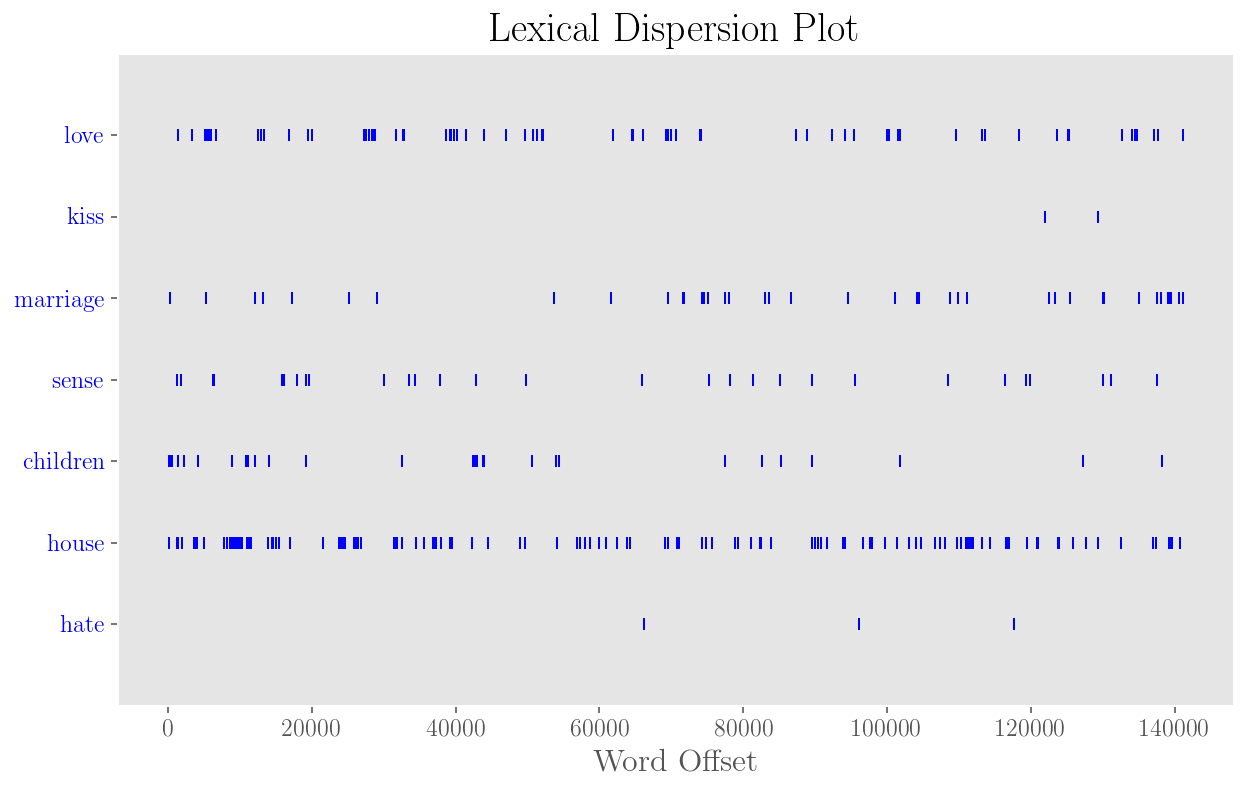

In [7]:
# Dispersion plot of text given some words (how far from the start word appears in text)
plt.grid()
book.dispersion_plot(words)

Num tokens for word love: 77.000000
Num tokens:  141576
Num unique tokens 6833
Token with the highest count is , with count 9397
Hapaxes are (10 of them) ['Sense', 'Sensibility', 'Jane', 'Austen', '1811', ']', 'generations', 'inheritor', 'bequeath', 'Gentleman']


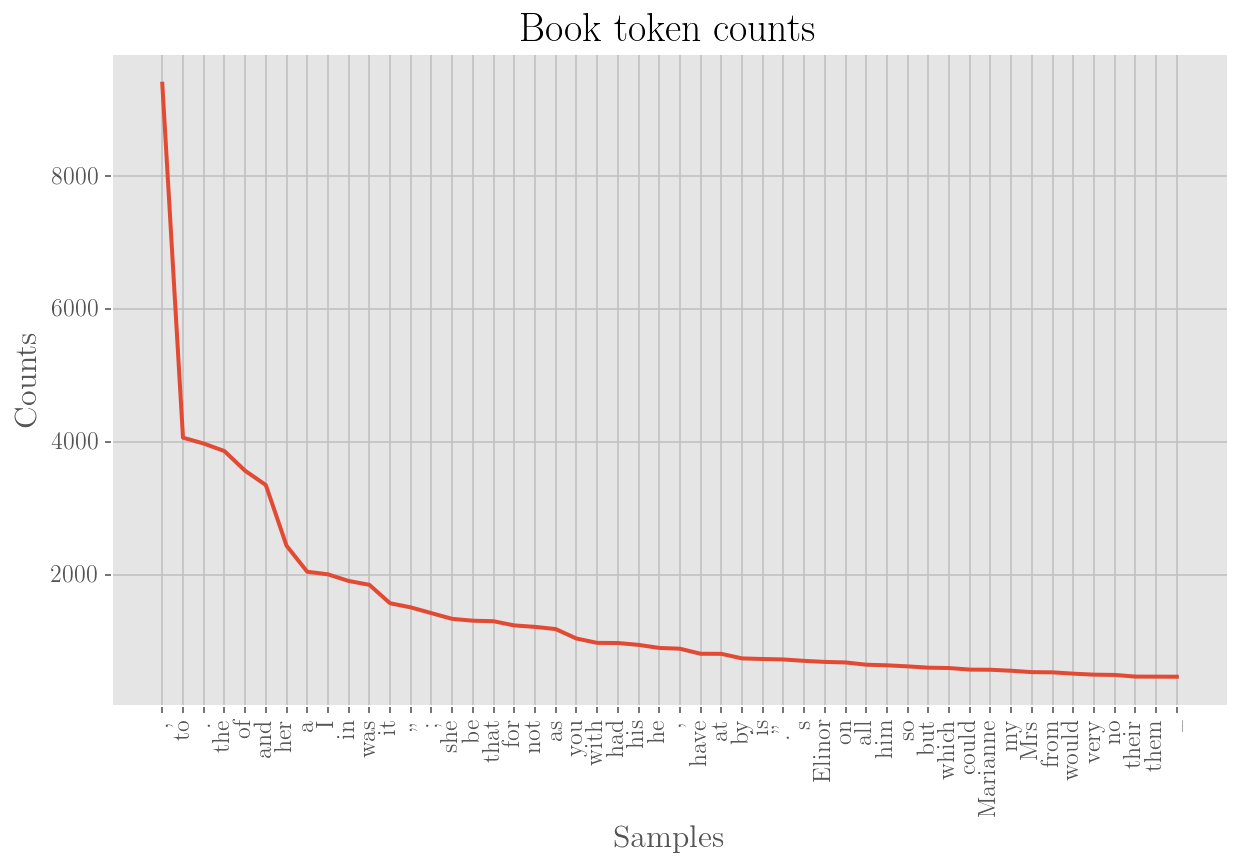

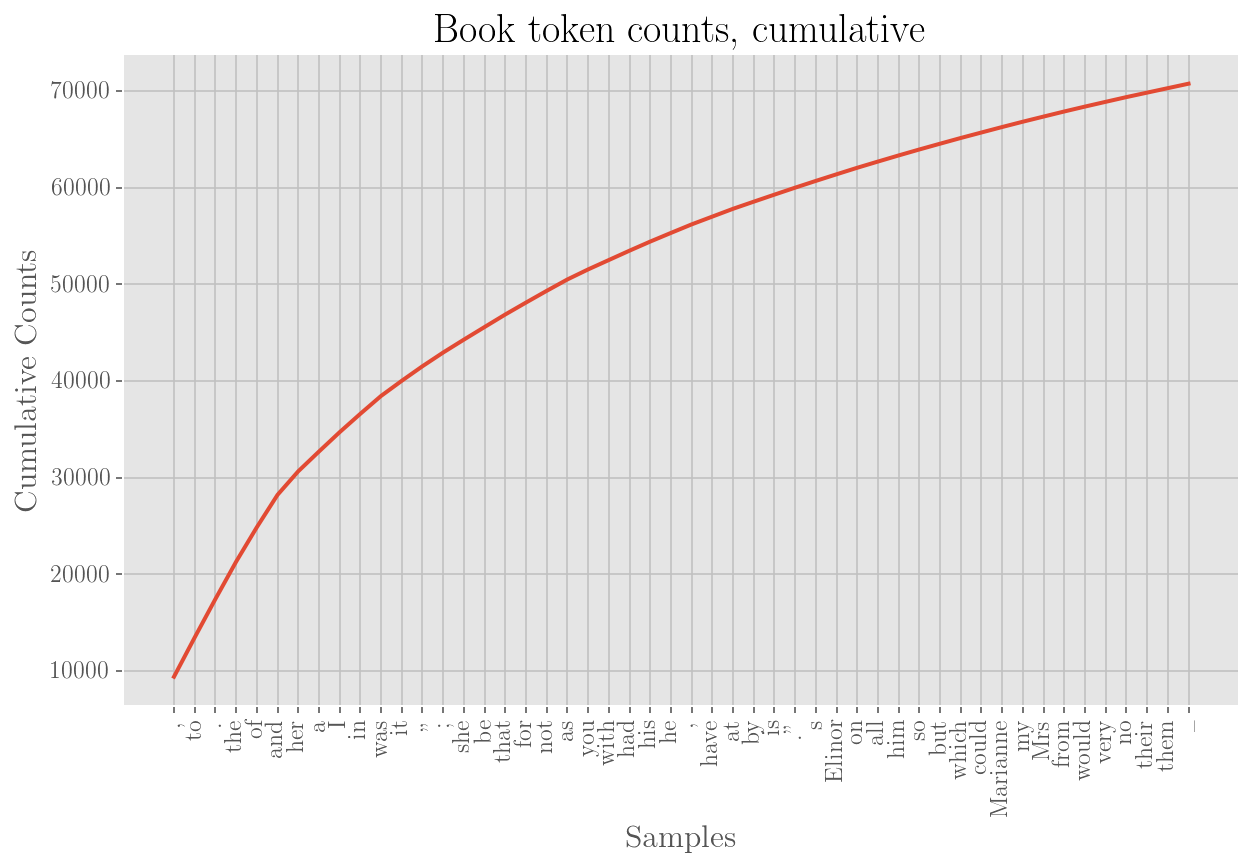

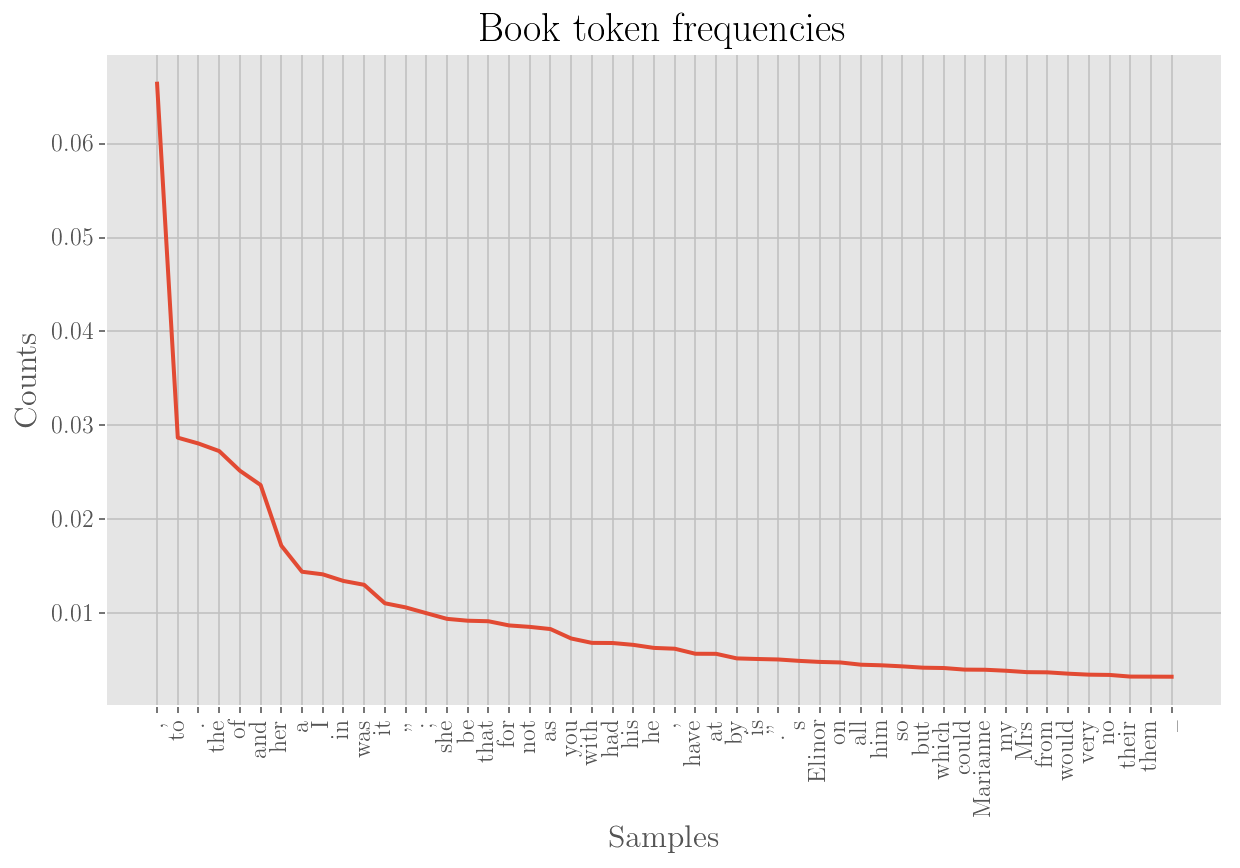

In [8]:
## FreqDist for token counts 

fdist = FreqDist(book)                                      # FreqDist needs a tokens list, gives dict {token: counts}

word = 'love'
print('Num tokens for word %s: %f' %(word, fdist[word]))
print('Num tokens: ', fdist.N())
print('Num unique tokens', fdist.B())
print('Token with the highest count is %s with count %d' %(fdist.max(), fdist[fdist.max()]))
print('Hapaxes are (10 of them)', fdist.hapaxes()[:10])

# Plot the 50 most frequent tokens and their token counts, normal and cumulative
fdist.plot(50, title='Book token counts')
fdist.plot(50, cumulative=True, title='Book token counts, cumulative')

# Same distrib, normal but with frequency instead of counts
plot_freqdist_freq(fdist, max_num=50, title='Book token frequencies')

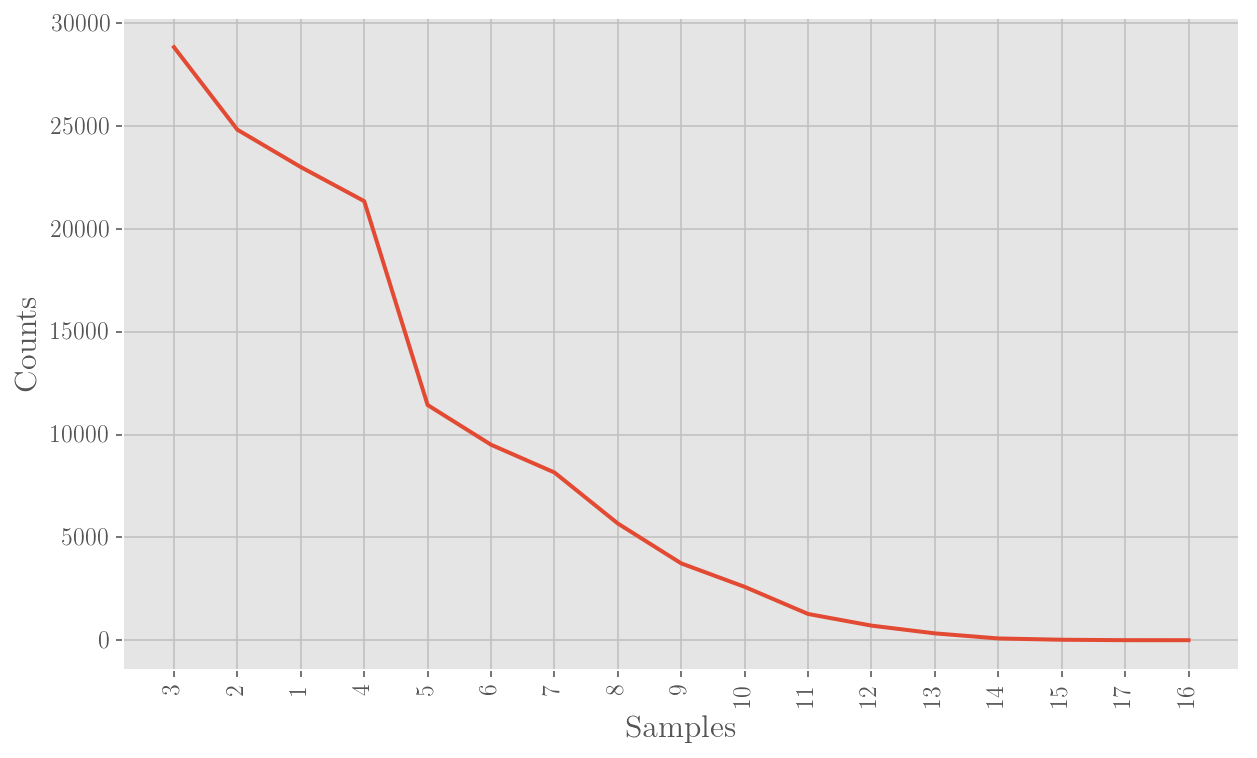

    3     2     1     4     5     6     7     8     9    10    11    12    13    14    15    17    16 
28839 24826 23009 21352 11438  9507  8158  5676  3736  2596  1278   711   334    87    24     3     2 


In [9]:
## FreqDist for word lenghts

fdist_wl = FreqDist([len(word) for word in book])

# Plot and show as table
fdist_wl.plot()
fdist_wl.tabulate()

All genres in Brown corpus:  ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


nltk.probability.FreqDist

         the love hate 
romance 2758   32    9 


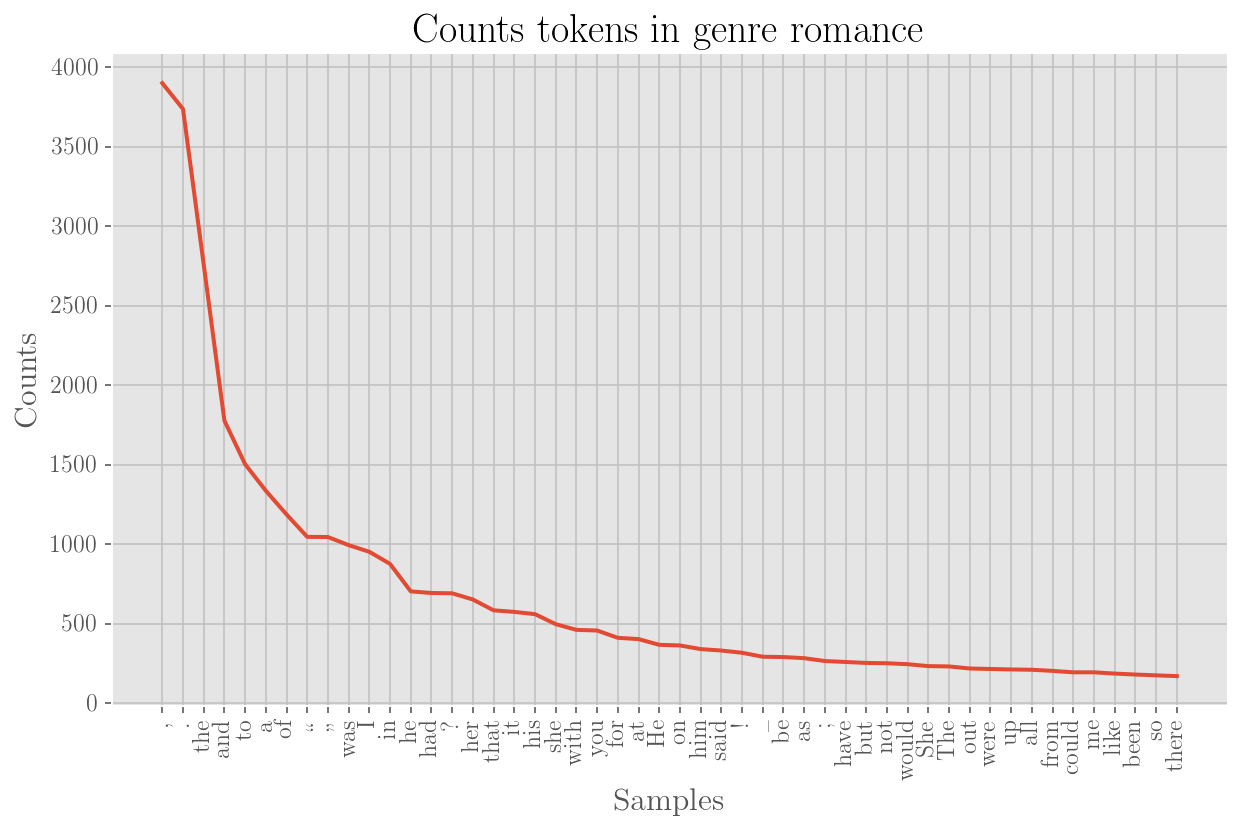

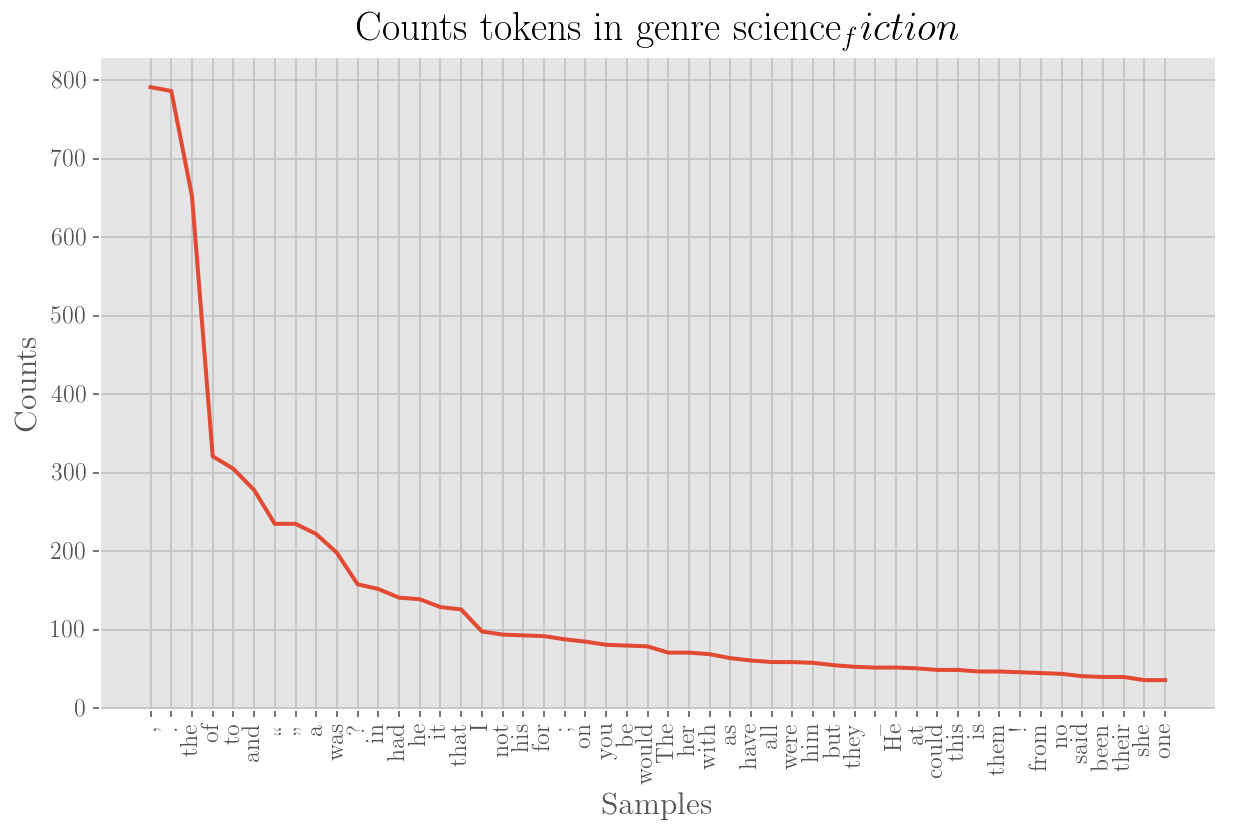

In [11]:
# Conditional freq distrib on Brown corpus genres

# ConditionalFreqDist is a collection of freq dist, one per condition
# requires tuples (condition, event)

# print genres in corpus
print('All genres in Brown corpus: ', sorted(brown.categories()))

# choosing some of the categories (genres) and get the words in each
tuples = [(genre, word) for genre in ['romance', 'science_fiction'] for word in brown.words(categories=genre)]

# Building the cfdist
cfdist = ConditionalFreqDist(tuples)

# Each cfdist[condition] will be a FreqDist
type(cfdist['romance'])

# Tabulate selecting the conditions and the specific samples (no selection will give all)
cfdist.tabulate(conditions=['romance'], samples=['the', 'love', 'hate'])

# Plotting any of the dists on the condition
cfdist['romance'].plot(50, title='Counts tokens in genre romance')
cfdist['science_fiction'].plot(50, title='Counts tokens in genre science_fiction')

## Treebank

* Parsed sentences

In [12]:
# The Treebank corpus in NLTK contains 10% of the original Penn Treebank corpus

treebank.words()

treebank.parsed_sents()

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', ...]

[Tree('S', [Tree('NP-SBJ', [Tree('NP', [Tree('NNP', ['Pierre']), Tree('NNP', ['Vinken'])]), Tree(',', [',']), Tree('ADJP', [Tree('NP', [Tree('CD', ['61']), Tree('NNS', ['years'])]), Tree('JJ', ['old'])]), Tree(',', [','])]), Tree('VP', [Tree('MD', ['will']), Tree('VP', [Tree('VB', ['join']), Tree('NP', [Tree('DT', ['the']), Tree('NN', ['board'])]), Tree('PP-CLR', [Tree('IN', ['as']), Tree('NP', [Tree('DT', ['a']), Tree('JJ', ['nonexecutive']), Tree('NN', ['director'])])]), Tree('NP-TMP', [Tree('NNP', ['Nov.']), Tree('CD', ['29'])])])]), Tree('.', ['.'])]), Tree('S', [Tree('NP-SBJ', [Tree('NNP', ['Mr.']), Tree('NNP', ['Vinken'])]), Tree('VP', [Tree('VBZ', ['is']), Tree('NP-PRD', [Tree('NP', [Tree('NN', ['chairman'])]), Tree('PP', [Tree('IN', ['of']), Tree('NP', [Tree('NP', [Tree('NNP', ['Elsevier']), Tree('NNP', ['N.V.'])]), Tree(',', [',']), Tree('NP', [Tree('DT', ['the']), Tree('NNP', ['Dutch']), Tree('VBG', ['publishing']), Tree('NN', ['group'])])])])])]), Tree('.', ['.'])]), ...]

## WordNet

* Hypernyms and Hyponyms 

In [14]:
wn = wordnet

sss = wn.synsets('dog')

s1 = sss[0]
print(s1, s1.definition())

print(s1.hypernyms(), s1.hyponyms())

Synset('dog.n.01') a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
[Synset('canine.n.02'), Synset('domestic_animal.n.01')] [Synset('basenji.n.01'), Synset('corgi.n.01'), Synset('cur.n.01'), Synset('dalmatian.n.02'), Synset('great_pyrenees.n.01'), Synset('griffon.n.02'), Synset('hunting_dog.n.01'), Synset('lapdog.n.01'), Synset('leonberg.n.01'), Synset('mexican_hairless.n.01'), Synset('newfoundland.n.01'), Synset('pooch.n.01'), Synset('poodle.n.01'), Synset('pug.n.01'), Synset('puppy.n.01'), Synset('spitz.n.01'), Synset('toy_dog.n.01'), Synset('working_dog.n.01')]


## Text manipulation with NLTK

* Tokenizing
* POS tagging
* Stemming/lemmatizing

In [2]:
# tagged sentences from Brown corpus
brown_tagged_sents = brown.tagged_sents(categories='news')

# Separate tagged sents into train and test
train_sents = brown_tagged_sents[:int(len(brown_tagged_sents) * 0.8)]
test_sents = brown_tagged_sents[int(len(brown_tagged_sents) * 0.8):]

In [7]:
# Tokenising
# NOTE: obvs the easiest sentence tokenization (naive) is splitting on period with split('.'). 
# this won't understand "Mr. Smith." though 
# similarly for tokenizing a sentence into tokens

text = """What will you do? I go to the cinema this weekend. That's a test. I can't do better!"""

# Standard methods are wrappers around the recommended tokenizers, so equivalent to 
# so equivalent to tokenizer = TreebankWordTokenizer(); tokenizer.tokenize(sentence)

# Tokenizing text into sentences

# sent_tokenize calls the PunktSentenceTokenizer (recommended)
print('* Docs of PunktSentenceTokenizer:')
print(PunktSentenceTokenizer.__doc__)
st = sent_tokenize(text)
print('* Text tokenized', st)

# To train tokenizer on a bespoke text:
# import nltk.tokenize.punkt
# tokenizer = PunktSentenceTokenizer()
# text = open("someplain.txt","r").read()
# tokenizer.train(text)

# Tokenizing a sentence into tokens

# word_tokenise calls the TreebankWordTokenizer (recommended)
print('* Docs of TreebankWordTokenizer:')
print(TreebankWordTokenizer.__doc__)
tokens = word_tokenize(st[2])
print('* Sentence tokenized', tokens)
# wordpunct_tokenise calls WordPunctTokenizer, it will separate all punctuation as tokens (uses a regexp)
print(WordPunctTokenizer.__doc__)
tokens_punct = wordpunct_tokenize(st[2])
print('* Sentence tokenized with a regexp tokenizer', tokens_punct)

* Docs of PunktSentenceTokenizer:

    A sentence tokenizer which uses an unsupervised algorithm to build
    a model for abbreviation words, collocations, and words that start
    sentences; and then uses that model to find sentence boundaries.
    This approach has been shown to work well for many European
    languages.
    
* Text tokenized ['What will you do?', 'I go to the cinema this weekend.', "That's a test.", "I can't do better!"]
* Docs of TreebankWordTokenizer:

    The Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank.
    This is the method that is invoked by ``word_tokenize()``.  It assumes that the
    text has already been segmented into sentences, e.g. using ``sent_tokenize()``.

    This tokenizer performs the following steps:

    - split standard contractions, e.g. ``don't`` -> ``do n't`` and ``they'll`` -> ``they 'll``
    - treat most punctuation characters as separate tokens
    - split off commas and single quotes, when followed b

In [8]:
# POS tagging

# pos_tag uses the PerceptronTagger
print('* Tagged tokens from above', pos_tag(tokens))

# Evaluate the performance of some taggers

# The UnigramTagger will assign tag to token as the most probable for that token given a training set
unigram_tagger = UnigramTagger(train_sents)
print('* Evaluation Unigram tagger:', unigram_tagger.evaluate(test_sents))

# Repeat with an NGramTagger (assign the most probable tag given word and N - 1 previous context words)
threegram_tagger = NgramTagger(3, train_sents)  # for n=2 there is already a BigramTagger
print('* Evaluation Ngram tagger with N=3:', threegram_tagger.evaluate(test_sents))    # slow due to sparsity: trained tagger hasn't seen many word-context combinations

# Combining taggers: start with the Ngram one, if it can't find a tag for token fallback to the unigram one
t0 = UnigramTagger(train_sents)
t1 = NgramTagger(3, train_sents, backoff=t0)
print('* Evaluation combined tagger:', t1.evaluate(test_sents))

* Tagged tokens from above [('That', 'DT'), ("'s", 'VBZ'), ('a', 'DT'), ('test', 'NN'), ('.', '.')]
* Evaluation Unigram tagger: 0.8026879907509996
* Evaluation Ngram tagger with N=3: 0.05867334650031312
* Evaluation combined tagger: 0.8053374440001927


In [9]:
# Stemming
# Stemming some words with Porter, Lancaster and Snowball stemmers

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer('english')

print('* Stemming with (in order) Porter, Lancaster, Snowball')
print('multiply: ', 
      porter_stemmer.stem('multiply'), 
      lancaster_stemmer.stem('multiply'), 
      snowball_stemmer.stem('multiply'))
print('mice: ', 
      porter_stemmer.stem('mice'), 
      lancaster_stemmer.stem('mice'), 
      snowball_stemmer.stem('mice'))

* Stemming with (in order) Porter, Lancaster, Snowball
multiply:  multipli multiply multipli
mice:  mice mic mice


In [10]:
# Lemmatizing with the WordNet lemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

print('mice: ', wordnet_lemmatizer.lemmatize('mice'))

mice:  mouse
